In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv("cp_new_reg.csv")

In [3]:
df.head()
df=(df-df.min())/(df.max()-df.min())

df

,branch-misses,iTLB-load-misses,dTLB-load-misses,dTLB-store-misses,L1-icache-load-misses,L1-dcache-load-misses,l2_rqsts.all_demand_miss,LLC-load-misses,LLC-store-misses,CPI
0,1.330434e-03,0.000006,0.000300,0.000016,0.000564,1.246522e-02,0.002596,0.000656,0.000173,0.896907
1,1.629742e-03,0.000815,0.001192,0.000002,0.000248,1.765338e-05,0.000216,0.016274,0.003277,0.268041
2,6.551316e-03,0.001468,0.000863,0.000285,0.000036,6.443399e-05,0.000009,0.000120,0.084533,0.865979
3,1.679434e-01,0.005366,0.000417,0.000248,0.000510,9.883833e-07,0.000102,0.000001,0.000743,0.443299
4,3.175603e-01,0.806258,0.283252,0.005629,0.000705,5.350634e-04,0.001235,0.000008,0.000219,0.731959
5,3.248139e-04,0.355618,0.681161,0.190600,0.007825,3.550831e-04,0.000251,0.000917,0.000002,0.309278
6,5.355943e-04,0.000019,0.382187,0.424040,0.127331,1.103574e-02,0.001176,0.000329,0.001699,0.278351
7,1.740561e-03,0.000861,0.000817,0.327731,0.504153,1.370235e-01,0.013647,0.002193,0.001188,0.731959
8,7.774964e-03,0.002530,0.000954,0.000043,0.396623,6.540104e-01,0.205711,0.015386,0.002214,0.536082
9,2.517435e-05,0.021276,0.002216,0.001293,0.000072,3.594806e-01,0.634842,0.219189,0.010238,0.144330


In [4]:
df.shape

(697, 10)

In [5]:
print(df.corr())

                          branch-misses  iTLB-load-misses  dTLB-load-misses  \
branch-misses                  1.000000          0.532417         -0.040936   
iTLB-load-misses               0.532417          1.000000          0.522657   
dTLB-load-misses              -0.040936          0.522657          1.000000   
dTLB-store-misses             -0.184428         -0.056977          0.535525   
L1-icache-load-misses         -0.186346         -0.184856         -0.041855   
L1-dcache-load-misses         -0.182303         -0.184294         -0.189229   
l2_rqsts.all_demand_miss      -0.190579         -0.176103         -0.185494   
LLC-load-misses               -0.200984         -0.186949         -0.179939   
LLC-store-misses              -0.201656         -0.197485         -0.189367   
CPI                            0.027465         -0.017987         -0.073186   

                          dTLB-store-misses  L1-icache-load-misses  \
branch-misses                     -0.184428              -0.

In [6]:
print(df.describe())

       branch-misses  iTLB-load-misses  dTLB-load-misses  dTLB-store-misses  \
count     697.000000        697.000000        697.000000         697.000000   
mean        0.064541          0.070157          0.075780           0.067647   
std         0.145003          0.160814          0.171057           0.154108   
min         0.000000          0.000000          0.000000           0.000000   
25%         0.000097          0.000098          0.000105           0.000086   
50%         0.001738          0.001744          0.002168           0.001573   
75%         0.007657          0.008714          0.009398           0.007879   
max         1.000000          1.000000          1.000000           1.000000   

       L1-icache-load-misses  L1-dcache-load-misses  l2_rqsts.all_demand_miss  \
count             697.000000             697.000000                697.000000   
mean                0.080135               0.075092                  0.087922   
std                 0.178587               0.

In [7]:
X = df[['branch-misses','iTLB-load-misses','dTLB-load-misses','dTLB-store-misses','L1-icache-load-misses','L1-dcache-load-misses','l2_rqsts.all_demand_miss','LLC-load-misses','LLC-store-misses']]
y = df['CPI']

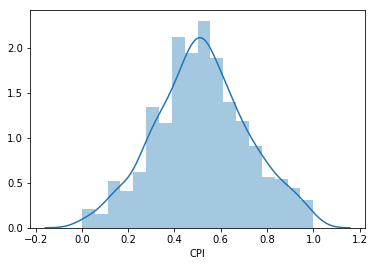

In [8]:
sns.distplot(df['CPI']);

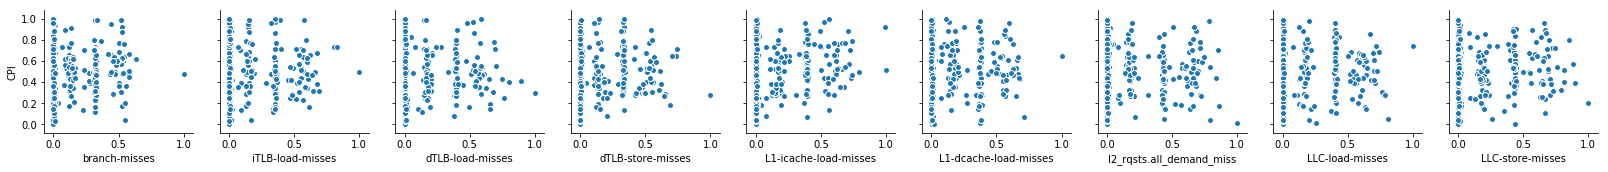

In [9]:
sns.pairplot(df, x_vars=['branch-misses','iTLB-load-misses','dTLB-load-misses','dTLB-store-misses','L1-icache-load-misses','L1-dcache-load-misses','l2_rqsts.all_demand_miss','LLC-load-misses','LLC-store-misses'], y_vars='CPI', aspect=1, kind='scatter')
plt.show()

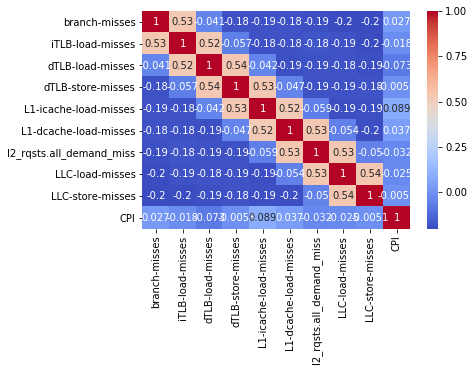

In [10]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [11]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [12]:
y_train.shape

(557,)

In [13]:
y_test.shape

(140,)

In [14]:
reg_model = linear_model.LinearRegression()

In [15]:
#Fitting the Multiple Linear Regression model
# reg_model = LinearRegression().fit(X_train, y_train)
# print(f"Linear Regression-Training set score: {reg_model.score(X_train, y_train):.2f}")
# print(f"Linear Regression-Test set score: {reg_model.score(X_test, y_test):.2f}")

In [16]:
# from sklearn.linear_model import Ridge
# reg_model = Ridge(alpha=0.9).fit(X_train, y_train)
# print(f"Ridge Regression-Training set score: {reg_model.score(X_train, y_train):.2f}")
# print(f"Ridge Regression-Test set score: {reg_model.score(X_test, y_test):.2f}")

In [17]:

# reg_model=LinearRegression(positive= True)
reg_model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  0.522578998678651


[('branch-misses', 0.07420218918643523),
 ('iTLB-load-misses', -0.06990952176317074),
 ('dTLB-load-misses', 0.010059085738456045),
 ('dTLB-store-misses', -0.054908730253732455),
 ('L1-icache-load-misses', 0.07674998424352895),
 ('L1-dcache-load-misses', 0.039009845697278875),
 ('l2_rqsts.all_demand_miss', -0.07861010457474522),
 ('LLC-load-misses', 0.02587023206969828),
 ('LLC-store-misses', 0.00727050350229162)]

In [19]:
#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train) 

In [20]:
print("Prediction for test set: {}".format(y_pred))
print()
print("Prediction for train set: {}".format(x_pred))

Prediction for test set: [0.52164736 0.50775909 0.52341651 0.49757597 0.55049408 0.49743395
 0.50586769 0.4957844  0.52329867 0.52590325 0.52278174 0.52324973
 0.46493857 0.53709003 0.56088982 0.5089975  0.51235915 0.50517579
 0.49597155 0.55908248 0.52635733 0.55094925 0.49645513 0.56099167
 0.52251636 0.49668002 0.49708918 0.52338513 0.52159856 0.5108254
 0.54023308 0.50533997 0.56838166 0.52213495 0.51142642 0.49140654
 0.50659871 0.51013766 0.52598612 0.49567455 0.5194001  0.52321477
 0.5598716  0.49768643 0.52331951 0.52203793 0.50563067 0.50801864
 0.486958   0.52313786 0.50600625 0.5211362  0.50466839 0.52637385
 0.55385599 0.47520922 0.56262844 0.4977231  0.52254584 0.53310619
 0.55693253 0.49650034 0.52161098 0.52270778 0.51235252 0.50777832
 0.52253905 0.52332043 0.49632889 0.5322844  0.49575747 0.55726087
 0.52328619 0.52591036 0.52602222 0.53374798 0.50082094 0.5210322
 0.53303048 0.56720036 0.53914644 0.52621148 0.51093654 0.52300183
 0.53799333 0.58973853 0.52312351 0.555

In [21]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred , '  Residue': y_test-y_pred})

reg_model_diff

,Actual value,Predicted value,Residue
405,0.340206,0.521647,-0.181441
152,0.639175,0.507759,0.131416
538,0.371134,0.523417,-0.152282
366,0.350515,0.497576,-0.147061
219,0.309278,0.550494,-0.241216
124,0.474227,0.497434,-0.023207
173,0.567010,0.505868,0.061143
195,0.536082,0.495784,0.040298
105,0.206186,0.523299,-0.317113
160,0.350515,0.525903,-0.175388


In [22]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r_squared = reg_model.score(X, y)


print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)
print('R^2 value :', r_squared)
print('F-ststistic value : ' , r2/mse)

print()
print()
mae = metrics.mean_absolute_error(y_train, x_pred)
mse = metrics.mean_squared_error(y_train, x_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_train, x_pred))
r_squared = reg_model.score(X, y)


print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)
print('R^2 value :', r_squared)
# print('Adjusted R^2 value : ' , adjusted_r^2)


Mean Absolute Error: 0.18084393030331455
Mean Square Error: 0.0494761596860864
Root Mean Square Error: 0.22243237103912372
R^2 value : 0.010650741560247035
F-ststistic value :  4.495748506965786


Mean Absolute Error: 0.15176644543654563
Mean Square Error: 0.036887779884649266
Root Mean Square Error: 0.19206191679937298
R^2 value : 0.010650741560247035


In [23]:
#display adjusted R-squared
1 - (1-reg_model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

-0.002310165755557536

In [24]:
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
p_values=model.summary2().tables[1]['P>|t|']
p_values

const                       1.490690e-145
branch-misses                3.507872e-01
iTLB-load-misses             4.585558e-01
dTLB-load-misses             9.283502e-01
dTLB-store-misses            6.632713e-01
L1-icache-load-misses        5.059192e-01
L1-dcache-load-misses        7.527775e-01
l2_rqsts.all_demand_miss     4.413605e-01
LLC-load-misses              7.734803e-01
LLC-store-misses             9.091015e-01
Name: P>|t|, dtype: float64

In [25]:

from sklearn.metrics import r2_score
 
r2 = r2_score(y_test, y_pred) 
print('r2 score for  model is', r2) 


r2 score for  model is -0.01070713437093973
